In [1]:
from spikee.utils import conv
from spikee.utils import preprocessing
from spikee.utils.batcher import batch_provider
from spikee.models.SpikE import SpikE_Scorer_AS as scorer
from spikee.training import train_and_evaluate as train
import matplotlib.pyplot as plt

import os
import torch
import numpy as np
np.random.seed(12312345)

**Load data**

In [2]:
datapath = '../data/Countries_S1'
train_data, valid_data, num_nodes, num_predicates = conv.load_data(datapath)

ent2id = conv.get_ent2id(datapath)
rel2id = conv.get_rel2id(datapath)
id2ent = conv.get_id2ent(datapath)

In [3]:
if not os.path.exists('{}/valid_filter_po.npy'.format(datapath)):
    print('Creating data for filtered metrics...')
    preprocessing.filter_data(datapath)

Creating data for filtered metrics...


/home/dodo/anaconda3/envs/test/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


**Set up and train model (not perfectly tweaked!)**

In [4]:
params = {
    'dim': 40,
    'input_size': 40,
    'tau': 0.5,
    'batchsize': 64,
    'delta': 0.001,
    'lr': .1,
    'L2': 0.,
    'steps': 801,
    'neg_samples': 10,
    'maxspan': 2,
}
eval_points = list(range(0, 1001, 200))
seed = np.random.randint(1e8)

In [5]:
batcher = batch_provider(train_data, params['batchsize'], params['neg_samples'], seed)
model = scorer(num_nodes, num_predicates, params['dim'], params['input_size'], params['tau'], params['maxspan'], seed)
optimizer = torch.optim.Adagrad([model.entities.weights.weight, model.predicates.weight], lr=params['lr'], weight_decay = params['L2'])
train(optimizer, batcher, model,params['delta'],\
      params['steps'], eval_points, datapath = datapath,\
      data = [train_data, valid_data])

0:

train ~~~~SP~~~~ hits@1: 0.0018 __hits@3: 0.0027 __ mean: 146.8209 __ MRR: 0.0157

train ~~~~PO~~~~ hits@1: 0.0018 __hits@3: 0.0063 __ mean: 127.9622 __ MRR: 0.0224

valid ~~~~SP~~~~ hits@1: 0.0000 __hits@3: 0.0000 __ mean: 183.5000 __ MRR: 0.0114

valid ~~~~PO~~~~ hits@1: 0.0000 __hits@3: 0.0000 __ mean: 128.7083 __ MRR: 0.0207

ETA 8.57min 


200:

train ~~~~SP~~~~ hits@1: 0.3546 __hits@3: 0.8461 __ mean: 3.0864 __ MRR: 0.6086

train ~~~~PO~~~~ hits@1: 0.1755 __hits@3: 0.7102 __ mean: 9.4131 __ MRR: 0.4616

valid ~~~~SP~~~~ hits@1: 0.5417 __hits@3: 1.0000 __ mean: 1.4583 __ MRR: 0.7708

valid ~~~~PO~~~~ hits@1: 0.2083 __hits@3: 0.4583 __ mean: 4.0000 __ MRR: 0.4029

ETA 0.89min 


400:

train ~~~~SP~~~~ hits@1: 0.3537 __hits@3: 0.8704 __ mean: 2.4194 __ MRR: 0.6203

train ~~~~PO~~~~ hits@1: 0.2142 __hits@3: 0.7579 __ mean: 7.5068 __ MRR: 0.5008

valid ~~~~SP~~~~ hits@1: 0.4583 __hits@3: 1.0000 __ mean: 1.6250 __ MRR: 0.7153

valid ~~~~PO~~~~ hits@1: 0.1250 __hits@3: 0.6250 __ mea

**Neighborhood of Germany**

In [6]:
num_nodes = len(ent2id)
rankings = model.score([ent2id['germany']]*num_nodes, [1]*num_nodes, np.arange(num_nodes)).detach().numpy()
sorted_ids = list(np.argsort(rankings))[::-1]

for i in range(12):
    print(id2ent[sorted_ids[i]], rankings[sorted_ids[i]])

germany -0.08598379
switzerland -0.47906348
luxembourg -0.4968054
netherlands -0.64275926
france -0.6522672
belgium -0.7042271
liechtenstein -0.7336046
austria -0.8452571
czechia -1.1845202
italy -1.2530186
denmark -1.2581531
slovakia -1.3772969


**Neighborhood of Romania**

In [7]:
num_nodes = len(ent2id)
rankings = model.score([ent2id['romania']]*num_nodes, [1]*num_nodes, np.arange(num_nodes)).detach().numpy()
sorted_ids = list(np.argsort(rankings))[::-1]

for i in range(12):
    print(id2ent[sorted_ids[i]], rankings[sorted_ids[i]])

romania -0.08598379
moldova -0.502905
hungary -0.8067311
ukraine -0.95467067
bulgaria -1.4154843
serbia -1.4559752
poland -1.4695939
slovakia -1.5157331
slovenia -1.5239209
macedonia -1.5454077
greece -1.5655544
kosovo -1.592504


**Validation set**

In [8]:
for i,j,k in valid_data:
    print(id2ent[i], 'locatedin', id2ent[k], model.score([i], [j], [k]).detach().numpy()[0])

kosovo locatedin europe -2.1966066
south_sudan locatedin africa -1.9136417
brazil locatedin americas -2.18354
niger locatedin africa -1.8326555
serbia locatedin europe -2.1561332
colombia locatedin americas -2.0921144
guinea-bissau locatedin africa -2.599161
andorra locatedin europe -2.1452396
greece locatedin europe -2.3266656
panama locatedin americas -2.7122862
somalia locatedin africa -2.0380905
bosnia_and_herzegovina locatedin europe -2.2995942
macau locatedin asia -2.1823552
qatar locatedin asia -2.765574
mexico locatedin americas -2.5046325
burundi locatedin africa -2.233324
honduras locatedin americas -2.7724335
bangladesh locatedin asia -2.0282533
timor-leste locatedin asia -2.9055018
lesotho locatedin africa -2.8971827
romania locatedin europe -1.7491117
rwanda locatedin africa -2.1469777
ireland locatedin europe -2.484942
djibouti locatedin africa -2.3487754


In [9]:
neg_valid = [['kosovo', 'locatedin', 'asia'],
            ['ireland', 'locatedin', 'americas'],
            ['mexico', 'locatedin', 'northern_america'],
            ['mexico', 'locatedin', 'central_america'],
            ['mexico', 'locatedin', 'south_america'],
            ['mexico', 'locatedin', 'europe']]

for i,j,k in neg_valid:
    print(i,j,k, model.score([ent2id[i]], [rel2id[j]], [ent2id[k]]).detach().numpy()[0])

kosovo locatedin asia -4.814597
ireland locatedin americas -5.845233
mexico locatedin northern_america -1.137699
mexico locatedin central_america -1.0245221
mexico locatedin south_america -3.7488103
mexico locatedin europe -5.9285946


**Test set**

In [10]:
test_data = np.genfromtxt('{}/test.txt'.format(datapath), dtype='str')
for i,j,k in test_data:
    print(i,j,k, model.score([ent2id[i]], [rel2id[j]], [ent2id[k]]).detach().numpy()[0])

zambia locatedin africa -2.2347603
morocco locatedin africa -2.6570559
san_marino locatedin europe -2.2597647
canada locatedin americas -3.225848
uganda locatedin africa -2.1050792
belgium locatedin europe -2.3643875
syria locatedin asia -2.7419086
mali locatedin africa -2.033515
russia locatedin europe -2.314761
israel locatedin asia -2.8906589
republic_of_the_congo locatedin africa -1.8926746
guatemala locatedin americas -2.510765
sri_lanka locatedin asia -1.9586848
monaco locatedin europe -2.7456026
croatia locatedin europe -2.2872343
paraguay locatedin americas -2.5254724
poland locatedin europe -1.7358065
hong_kong locatedin asia -2.4489644
libya locatedin africa -1.8338642
jordan locatedin asia -2.794767
yemen locatedin asia -3.1490202
saudi_arabia locatedin asia -2.7927485
mauritania locatedin africa -2.3860276
suriname locatedin americas -2.3902903


In [11]:
neg_test = [['poland', 'locatedin', 'americas'],
            ['zambia', 'locatedin', 'europe'],
            ['hong_kong', 'locatedin', 'europe'],
            ['hong_kong', 'locatedin', 'americas']]

for i,j,k in neg_test:
    print(i,j,k, model.score([ent2id[i]], [rel2id[j]], [ent2id[k]]).detach().numpy()[0])

poland locatedin americas -5.8796663
zambia locatedin europe -6.7938704
hong_kong locatedin europe -5.731286
hong_kong locatedin americas -6.6998405


**Plotting membrane potentials + spikes for some exemplary neurons**

In [150]:
def plot_trace_and_spike(spikes, vmem, population, neuron, ax):
    sptime = float(spikes[population,neuron].detach().numpy())+1
    ax.vlines(sptime, 0.4, 4, linewidth=2)
    ax.plot(np.arange(0, int(sptime*101),1)*0.01, np.array(vmem)[:int(sptime*101),population,neuron])
    ax.set_xlim(0,2)

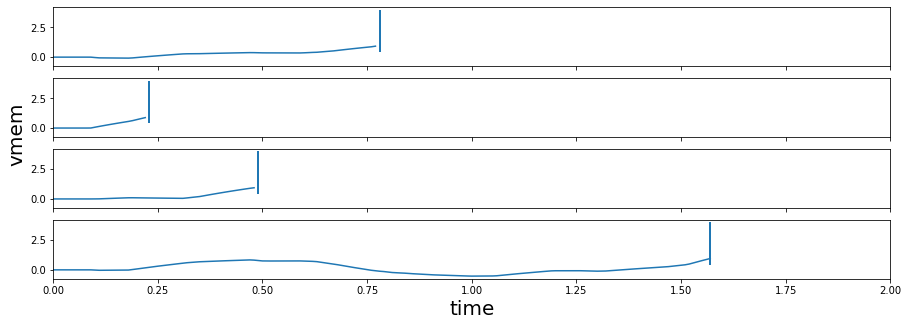

In [153]:
spikes, vmem = model.entities._integrate_model_using_Euler()
fig, ax = plt.subplots(4, sharex = True, sharey = True, figsize = (15,5))

neurons_to_plot = [[5,5], [1,7], [9,3], [40,11]]

for i in range(4):
    plot_trace_and_spike(spikes, vmem, neurons_to_plot[i][0], neurons_to_plot[i][1], ax[i])

ax[3].set_xlabel('time', fontsize = 20)
_ = ax[2].set_ylabel('vmem', y = 1.25, fontsize = 20)